In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [151]:
college = pd.read_csv('college.csv')

Making boxplots of Outstate vs Private. Fist the datasets are prepared for 'Yes' which means private and 'No' which means state. An 'Outstate' means out-of-state tuition.

In [152]:
def MakeBoxplot(dataframe, testedColumn, label1, label2, title):
    var1 = dataframe[testedColumn=='Yes']['Outstate']
    var2 = dataframe[testedColumn=='No']['Outstate']
    fig, ax = plt.subplots()
    ax.boxplot([var1, var2], labels=[str(label1), str(label2)])
    plt.title(title)
    plt.show()

In [153]:
def compareTopUni(namesOfUni, comparedUni):
    width = 0.7
    index = np.arange(len(namesOfUni))
    plt.figure(figsize=(18,10))
    p1 = plt.bar(index, comparedUni['Apps'], width, color='lightgreen', label='Applied')
    p2 = plt.bar(index, comparedUni['Accept'], width, color='mediumturquoise', label='Accepted')
    p3 = plt.bar(index, comparedUni['Enroll'], width, color='b', label='Enrolled')

    plt.ylabel('Number of students', fontsize=20)
    plt.xlabel('College', fontsize=20)
    plt.xticks(index, namesOfUni, rotation=90)
    plt.title('Number of students applying, accepted and enrolled to each college', fontsize=20)
    plt.legend(fontsize=15)
    plt.show()

Changing indexing into the first column, the index is now by the names of the universities.

In [154]:
college.set_index('Unnamed: 0', inplace=True)

In [155]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


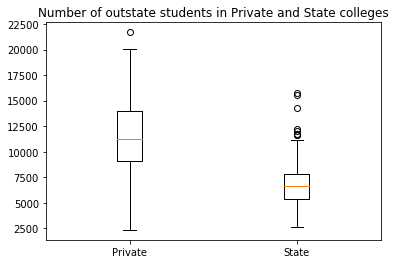

In [156]:
testedColumn = college['Private']
label1 = 'Private'
label2 = 'State'
title = "Number of outstate students in Private and State colleges"
MakeBoxplot(college, testedColumn, label1, label2, title)

An option with adding subplot:

In [157]:
#fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.boxplot([private, state], labels=['Private', 'State'])

Adding a new qualitative variable 'Elite': dividing universities into two groups based on whether or not the proportion of students coming from the top 10 % of their high school classes exceeds 50 %

In [158]:
college['Elite'] = 'No'
college.loc[college.Top10perc>50, 'Elite'] = 'Yes'

Counting the number of elite and non-elite colleges.

In [159]:
countElite = college['Elite']
countElite[countElite =='Yes'].count()

78

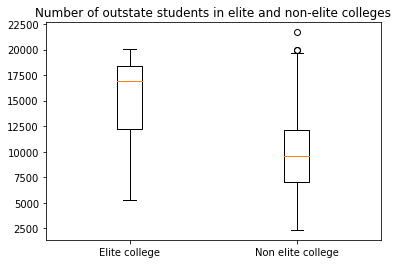

In [160]:
testedColumn = college['Elite']
label1 = 'Elite college'
label2 = 'Non elite college'
title = 'Number of outstate students in elite and non-elite colleges'
MakeBoxplot(college, testedColumn, label1, label2, title)

Bargraph presenting number of total applications, accepted applications and enrolled students for top 10 universities and univerisities starting every next 50 (50, 100, 150...). New dataframe *ranking* puts all the Top10perc values into descending order to put colleges from top to bottom, and then only three columns are left: Apps, Accept and Enroll. To avoid plotting all 777 colleges, only a probe is taken of first 10 colleges and then every college opening a new 50th and it is stored in a dataframe *comparedUni*. Then a new array is extracted *namesOfUni* with the ranking order of the names of colleges.

In [161]:
ranking = college.sort_values('Top10perc', ascending=False)
ranking = ranking[['Apps', 'Accept', 'Enroll']]

In [162]:
comparedUni = ranking.iloc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750]]

In [165]:
namesOfUni = comparedUni.index.values

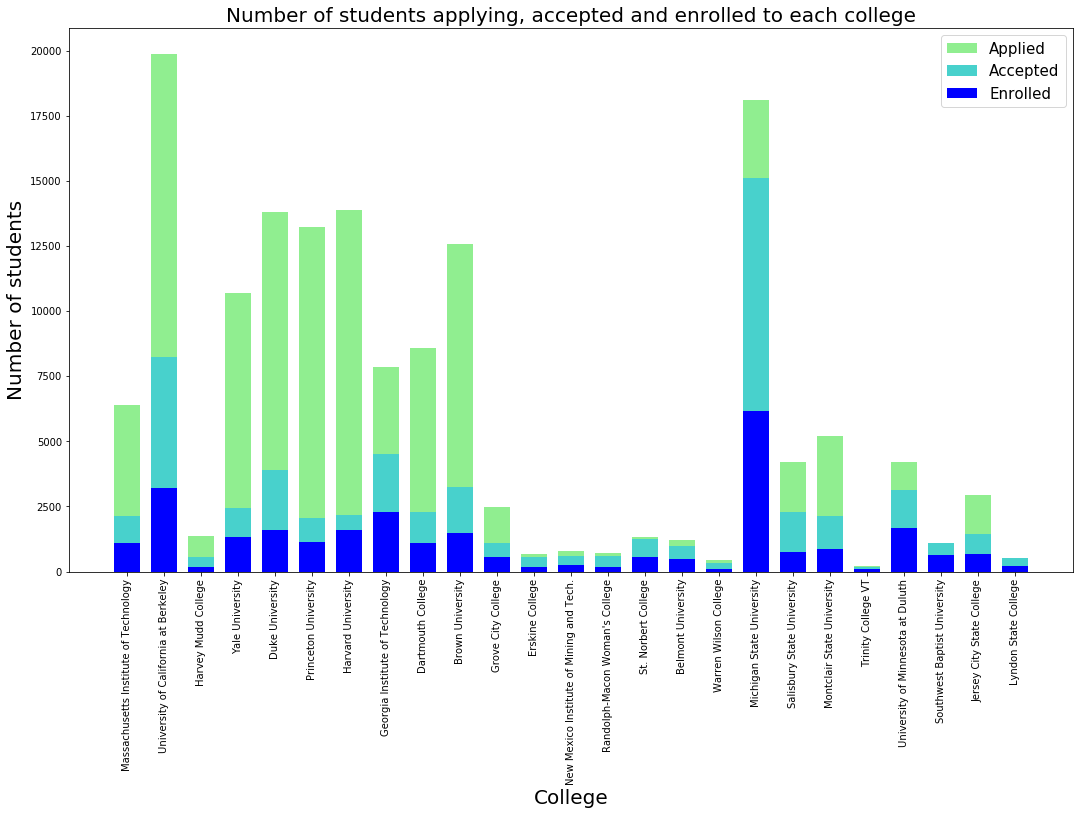

In [164]:
compareTopUni(namesOfUni, comparedUni)

I want to find out if there is a tendency - if we follow the ranking of celleges from top, will we see a change in the number of students pllying, accepted and enrolled? Is the number of applying students decresing? 

Colleges are devided into bins (10 colleges in each bin). Then a bargraph is prepared to see if there is a tendency in the number of applications, accepted students and enrolled students.

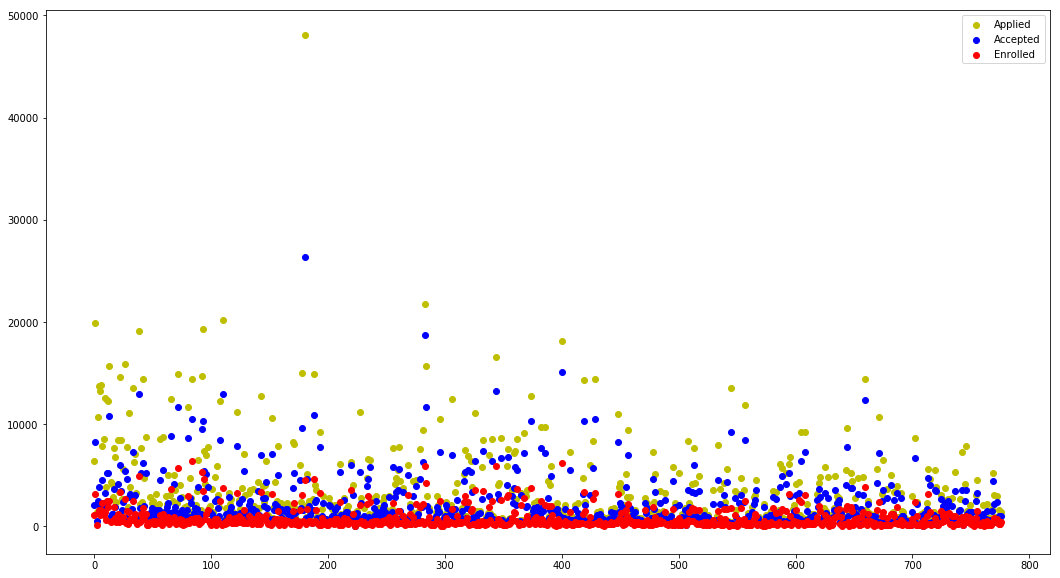

In [175]:
index=np.arange(len(ranking))

plt.figure(figsize=(18,10))
plt.scatter(index, ranking['Apps'], c='y', label='Applied')
plt.scatter(index, ranking['Accept'], c='b', label='Accepted')
plt.scatter(index, ranking['Enroll'], c='r', label='Enrolled')

plt.legend()
plt.show()